## Unit 1 capstone project



In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

In [93]:
def retrieveNonNegative(x):
    return (x >= 0)

In [94]:
def retrieve_NonNegative_list(lst):
    new_list = []
    for x in lst:
        new_list.append(x >= 0)
    return new_list

In [95]:
def retrieve_item_yes(x):
    return (str(x) == 'yes')

In [96]:
def retrieve_item_no(x):
    return (str(x) == 'no')

In [97]:
def retrieve_item_false_list(lst):
    new_list = []
    for x in lst:
        new_list.append(not x)
    return new_list

In [98]:
def dataFrame_filter_row(df, colname, func):
    print(df[colname])
    print(func(df[colname]))
    filter_list = func(df[colname])
    new_df = df.loc[(filter_list)]
    return new_df

##  read in data
>

In [99]:
df_customer = pd.read_csv("../data-201-resources-master/customers_data.csv")

In [100]:
df_customer.head(4)

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False


## clean negative values, NA,  until values look reasonable.

>

In [101]:
print('removing negative age......')
df_temp = df_customer[retrieve_NonNegative_list(df_customer['age'])] 
print('removing negative purchase amount......')                         
df = df_temp[retrieve_NonNegative_list(df_temp['purch_amt'])]

removing negative age......
removing negative purchase amount......


## verify the data are in the reasonable range 
>

In [102]:
print('The gender')
print(df['gender'].sort_values(ascending=True).unique())
print('The card_on_file')
print(df['card_on_file'].sort_values(ascending=True).unique())
print('The bool values of loyalty')
print(df['loyalty'].sort_values(ascending=True).unique())
print('The minimum purchase amount is {}'.format(df['purch_amt'].sort_values(ascending=True).min()))
print('The maximum purchase amount is {}'.format(df['purch_amt'].sort_values(ascending=True).max()))
print('The minimum age is {}'.format(df['age'].sort_values(ascending=True).min()))
print('The maximum age is {}'.format(df['age'].sort_values(ascending=True).max()))
print('The minimum days_since_last_purch is {}'.format(df['days_since_last_purch'].sort_values(ascending=True).min()))
print('The maximum days_since_last_purch is {}'.format(df['days_since_last_purch'].sort_values(ascending=True).max()))

The gender
['female' 'male']
The card_on_file
['no' 'yes']
The bool values of loyalty
[False  True]
The minimum purchase amount is 0.01
The maximum purchase amount is 142.2
The minimum age is -0.0
The maximum age is 71.0
The minimum days_since_last_purch is -9.0
The maximum days_since_last_purch is 125.0


## during rollout, the data is collected unbiased over gender and age.

     The first plots show the purchase amount distribution breaking by gender. Statistically
     the distributions are similar.
     
     The second plots show distribution of averaged purchase amount over age. It is pretty flat,
     no clear bias for specific age group.
     

<Figure size 1440x1080 with 0 Axes>

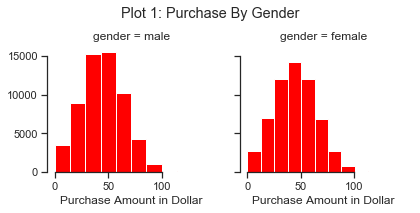

In [103]:
plt.figure(figsize=(20,15))
sns.set(style="ticks")
graph = sns.FacetGrid(df, col="gender")
graph.map(plt.hist, "purch_amt", color="red")
plt.subplots_adjust(top=0.8)
graph.set_axis_labels("Purchase Amount in Dollar")
plt.suptitle("Plot 1: Purchase By Gender")
sns.despine(trim=True)
plt.show()

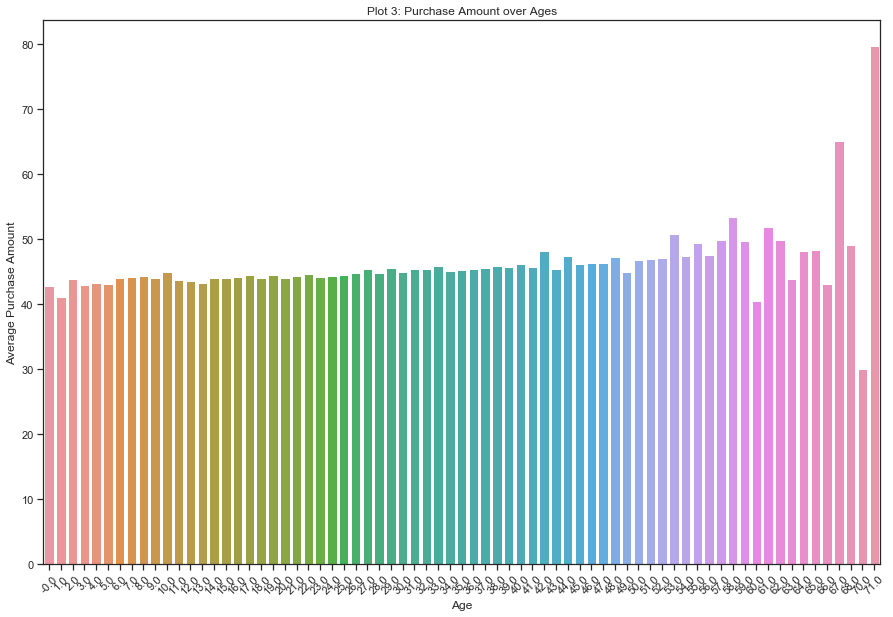

In [104]:
df_agesort = df.groupby(['age']).mean()
temp = df['age'].sort_values(ascending=True).unique()
df_agesort['age'] = temp

plt.figure(figsize=(15,10))
sns.barplot(x=df_agesort['age'], y=df_agesort['purch_amt'])
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.title('Plot 3: Purchase Amount over Ages')
plt.show()

## A/B test 1:     Does card_on_file make significant difference in customers' purchase amount 
>

In [105]:
df_card_yes = df[df['card_on_file'] == 'yes']

In [106]:
df_card_no = df[df['card_on_file'] == 'no']

In [107]:
print('The purchase mean of customers with card_on_file = {}'.format(df_card_yes['purch_amt'].mean()))
print('The purchase distribution Standard deviation of customers with card_on_file = {}'.format(df_card_yes['purch_amt'].std()))
print('The purchase mean of customers without card_on_file = {}'.format(df_card_no['purch_amt'].mean()))
print('The purchase distribution Standard deviation of customers without card_on_file = {}'.format(df_card_no['purch_amt'].std()))

The purchase mean of customers with card_on_file = 44.817038636093386
The purchase distribution Standard deviation of customers with card_on_file = 19.649348766563353
The purchase mean of customers without card_on_file = 44.8520277744687
The purchase distribution Standard deviation of customers without card_on_file = 19.540184921478332


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


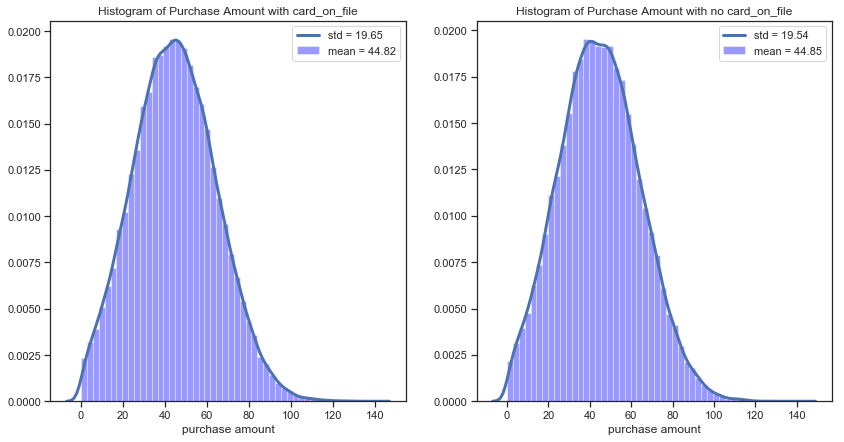

In [108]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
graph = sns.distplot(np.array(df_card_yes['purch_amt']), color='blue', axlabel='purchase amount', norm_hist=True,
                    label='mean = 44.82', kde_kws={"color":"b", "lw":3, "label":"std = 19.65"})
plt.legend(loc='upper right')
plt.title('Histogram of Purchase Amount with card_on_file')
plt.subplot(1, 2, 2)
graph = sns.distplot(np.array(df_card_no['purch_amt']), color='blue', axlabel='purchase amount', norm_hist=True,
                    label='mean = 44.85', kde_kws={"color":"b", "lw":3, "label":"std = 19.54"})
plt.legend(loc='upper right')
plt.title('Histogram of Purchase Amount with no card_on_file')
plt.show()

In [109]:
tval,pval = stats.ttest_ind(df_card_yes['purch_amt'], df_card_no['purch_amt'], equal_var=True)

In [110]:
print(tval)
print(pval)

-0.30615816073773267
0.7594847686874292


##   The card_on_file makes customers' purchase different 
##               at (1 - 0.76)% of confidence level. 
>

In [116]:
df_loyalty_true = df[df['loyalty']]
df_loyalty_false = df[retrieve_item_false_list(df.loyalty)]

In [118]:
print('The purchase mean of customers with loyalty = {}'.format(df_loyalty_true['purch_amt'].mean()))
print('The purchase distribution Standard deviation of customers with loyalty = {}'.format(df_loyalty_true['purch_amt'].std()))
print('The purchase mean of customers without loyalty = {}'.format(df_loyalty_false['purch_amt'].mean()))
print('The purchase distribution Standard deviation of customers without loyalty = {}'.format(df_loyalty_false['purch_amt'].std()))

The purchase mean of customers with loyalty = 54.1889771184309
The purchase distribution Standard deviation of customers with loyalty = 19.724898638070695
The purchase mean of customers without loyalty = 42.93069638196639
The purchase distribution Standard deviation of customers without loyalty = 19.012760677146936


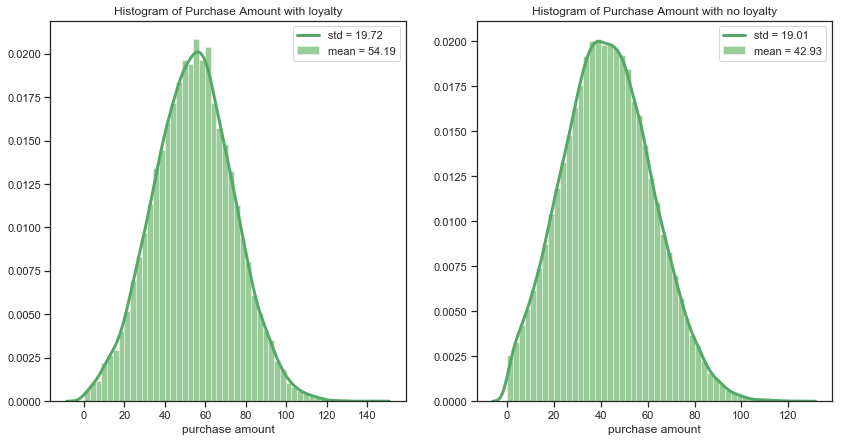

In [120]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
graph = sns.distplot(np.array(df_loyalty_true['purch_amt']), color='green', axlabel='purchase amount', norm_hist=True,
                    label='mean = 54.19', kde_kws={"color":"g", "lw":3, "label":"std = 19.72"})
plt.legend(loc='upper right')
plt.title('Histogram of Purchase Amount with loyalty')
plt.subplot(1, 2, 2)
graph = sns.distplot(np.array(df_loyalty_false['purch_amt']), color='green', axlabel='purchase amount', norm_hist=True,
                    label='mean = 42.93', kde_kws={"color":"g", "lw":3, "label":"std = 19.01"})
plt.legend(loc='upper right')
plt.title('Histogram of Purchase Amount with no loyalty')
plt.show()

In [121]:
tval,pval = stats.ttest_ind(df_loyalty_true['purch_amt'], df_loyalty_false['purch_amt'], equal_var=True)

In [122]:
print(tval)
print(pval)

75.62730011331767
0.0


##   The loyalty program makes customers' purchase different 
##               at > 99% of confidence level. 
>